# 演習1 解答例

In [1]:
# Qiskitライブラリーを導入
from qiskit import *
from qiskit.visualization import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.2',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': None,
 'qiskit': '0.19.5'}

## 演習1-(1) 
2量子ビット回路で、q0とq1がそれぞれ$|+\rangle$の重ね合わせの場合に、制御ゲートをq0、目標ゲートをq1でCNOTゲートを操作します。<br>

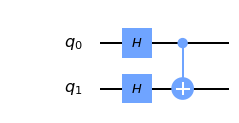

In [3]:
q = QuantumCircuit(2)    # 2量子ビット回路を用意

# q0とq1をそれぞれ|+⟩にします
q.h(0)
q.h(1)

# CXゲートの制御ゲートをq0、目標ゲートをq1にセットします。
q.cx(0,1)

q.draw(output="mpl")    # 回路を描画

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


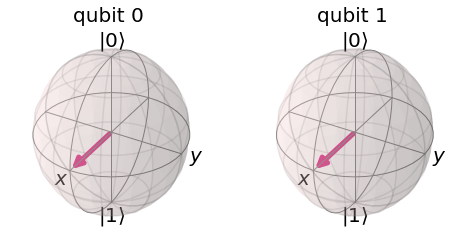

In [4]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$|++\rangle$にCNOTをかけても状態は変わりません。<br>
$ CNOT |++\rangle  = CNOT(|00\rangle+|01\rangle+|10\rangle+|11\rangle)=|++\rangle$

## 演習1-(2) 
2量子ビット回路で、q0が$|+\rangle$、q1が$|-\rangle$の重ね合わせの場合に、制御ゲートをq0、目標ゲートをq1でCNOTゲートを操作します。<br>

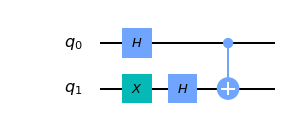

In [5]:
q = QuantumCircuit(2)    # 2量子ビット回路を用意

# q0を|+⟩、q1を|−⟩にします
q.h(0)
q.x(1)
q.h(1)

# CXゲートの制御ゲートをq0、目標ゲートをq1にセットします。
q.cx(0,1)

q.draw(output="mpl")    # 回路を描画

[ 0.5-0.j -0.5+0.j -0.5+0.j  0.5-0.j]


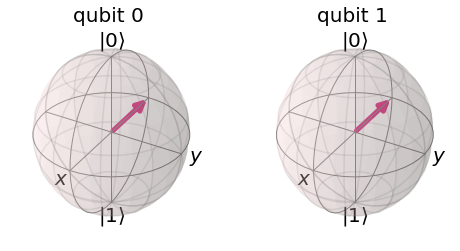

In [6]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$|-+\rangle$にCNOTをかけると、目標ビットの状態は変わらず、制御ビットの状態が変わります。<br>
（これを位相キックバックといい、ベルンシュタイン・ヴァジラニのアルゴリズムで使います。）<br>

$ CNOT |-+\rangle  = CNOT(|00\rangle+|01\rangle-|10\rangle-|11\rangle)=|00\rangle+|11\rangle-|10\rangle-|01\rangle=|--\rangle$

## 演習1-(3) 
4量子ビット回路で、q0、q1、q2が$|1\rangle$の場合に、3つのCNOTゲートをそれぞれq0、q1、q2を制御、q3を目標ゲートで操作します。<br>

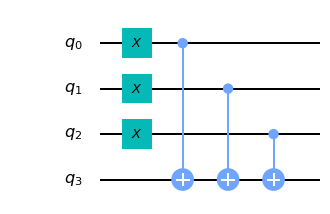

In [7]:
q = QuantumCircuit(4)    # 4量子ビット回路を用意

# q0、q1、q2をそれぞれ|1⟩にします
q.x(0)
q.x(1)
q.x(2)

# cxゲートを3つ追加します。制御/目標のペアは、q0/q3、q1/q3、q2/q3です。
q.cx(0,3)
q.cx(1,3)
q.cx(2,3)

q.draw(output='mpl')

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


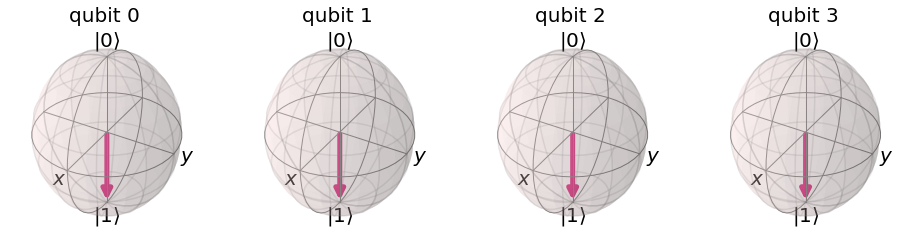

In [8]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

演習1-(3)の回路で、q0、q1、q2の入力を$|0\rangle$や$|1\rangle$に変えて、q3の状態がどうなるか実験してみましょう。<br>（この回路はドイチェ・ジョザのアルゴリズムで出てきます。）